In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
import matplotlib as plt
import torch
from torch.autograd import Variable
use_cuda = torch.cuda.is_available()

In [2]:
fil='/Users/uzi720/Desktop/'
data=pd.read_csv(fil+"tsIE.csv",sep=';')

data['Sessions']=data['Sessions'].astype('float')
data['str']=data['Month of Year'].astype(str)
data['year']=data['str'].str[:4]
data['month']=data['str'].str[4:]
print(data.dtypes)
data.head()
data.tail()

Month of Year      int64
Sessions         float64
str               object
year              object
month             object
dtype: object


,Month of Year,Sessions,str,year,month
79,201508,154854.0,201508,2015,08
80,201509,100407.0,201509,2015,09
81,201510,96439.0,201510,2015,10
82,201511,79689.0,201511,2015,11
83,201512,99689.0,201512,2015,12


In [3]:
result = data.groupby(['year'], as_index=False).agg(
                      {'Sessions':['mean','std']})
print(result)
print(result.columns)
year=result['year']
print(type(year))
yrs=year.values.tolist()

mean=result['Sessions']['mean']
std=result['Sessions']['std']
yr_mu=mean.values.tolist()
yr_std=std.values.tolist()
print(type(yrs[0]),type(yr_mu[0]), type(yr_std[0]))
print(type(data.iloc[0,3]),data.iloc[0,3],type(data.iloc[0,1]),data.iloc[0,1]) 


   year       Sessions              
                  mean           std
0  2009   81125.666667  19857.182943
1  2010  101085.083333  34454.598082
2  2011  101923.750000  23524.255583
3  2012  102986.000000  26878.443242
4  2013  118917.083333  27364.116352
5  2014  113627.250000  35534.987438
6  2015  127608.166667  32894.264169
MultiIndex(levels=[[u'Sessions', u'year'], [u'mean', u'std', u'']],
           labels=[[1, 0, 0], [2, 0, 1]])
<class 'pandas.core.series.Series'>
<type 'str'> <type 'float'> <type 'float'>
<type 'str'> 2009 <type 'numpy.float64'> 66953.0


In [4]:
data['Sessions'].plot()
cuts=[data['Sessions'].quantile(.1*i) for i in range(0,10)]
print (cuts , data['Sessions'].quantile(.90))




[52735.0, 69856.2, 77730.8, 87020.1, 94290.20000000001, 100113.0, 108201.00000000003, 124658.0, 136022.2, 151519.7] 151519.7


In [6]:
# Turn a Unicode string to plain ASCII, thanks to
# http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [7]:
# convert Session data to symbols from a,b,c,d,e,f,g,h,i,j
symbols=[]
for idx in data.index:
    if data.iloc[idx,1]< cuts[0]:
        symbols.append(normalizeString('a'))
    elif (data.iloc[idx,1]>=cuts[0] and data.iloc[idx,1] < cuts[1]):
        symbols.append(normalizeString('b'))
    elif (data.iloc[idx,1]>=cuts[1] and data.iloc[idx,1] < cuts[2]):
        symbols.append(normalizeString('c'))
    elif (data.iloc[idx,1]>=cuts[2] and data.iloc[idx,1] < cuts[3]):
        symbols.append(normalizeString('d'))
    elif (data.iloc[idx,1]>=cuts[3] and data.iloc[idx,1] < cuts[4]):
        symbols.append(normalizeString('e'))
    elif (data.iloc[idx,1]>=cuts[4] and data.iloc[idx,1] < cuts[5]):
        symbols.append(normalizeString('f'))
    elif (data.iloc[idx,1]>=cuts[5] and data.iloc[idx,1] < cuts[6]):
        symbols.append(normalizeString('g'))
    elif (data.iloc[idx,1]>=cuts[6] and data.iloc[idx,1] < cuts[7]):
        symbols.append(normalizeString('h'))
    elif (data.iloc[idx,1]>=cuts[7] and data.iloc[idx,1] < cuts[8]):
        symbols.append(normalizeString('i'))
    elif (data.iloc[idx,1]>=cuts[8] and data.iloc[idx,1] < cuts[9]):
        symbols.append(normalizeString('j'))
    else :
        symbols.append(normalizeString('k'))
print(len(symbols),symbols)

84 [u'b', u'b', u'e', u'd', u'g', u'g', u'h', u'f', u'c', u'b', u'b', u'b', u'c', u'c', u'f', u'k', u'j', u'g', u'h', u'h', u'd', u'c', u'b', u'd', u'e', u'e', u'f', u'f', u'i', u'i', u'i', u'j', u'e', u'd', u'c', u'b', u'g', u'e', u'g', u'h', u'h', u'i', u'j', u'j', u'e', u'd', u'b', u'b', u'h', u'g', u'i', u'h', u'i', u'j', u'k', u'k', u'e', u'f', u'c', u'e', u'g', u'd', u'f', u'i', u'i', u'k', u'k', u'j', u'd', u'e', u'c', u'c', u'j', u'h', u'k', u'h', u'j', u'k', u'k', u'k', u'g', u'f', u'd', u'f']


In [8]:
data['symbols']=symbols
print ( data.year.unique())
data.head()

['2009' '2010' '2011' '2012' '2013' '2014' '2015']


,Month of Year,Sessions,str,year,month,symbols
0,200901,66953.0,200901,2009,01,b
1,200902,61591.0,200902,2009,02,b
2,200903,87241.0,200903,2009,03,e
3,200904,85263.0,200904,2009,04,d
4,200905,100813.0,200905,2009,05,g


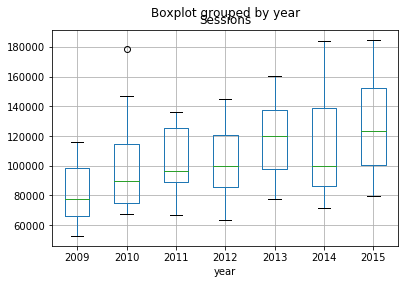

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
data.boxplot(by='year',column="Sessions")

In [10]:
lookup_symbols=dict(zip(data['Sessions'],data['symbols']))
lookup_symbols.items()


[(87042.0, u'e'),
 (100100.0, u'f'),
 (84997.0, u'd'),
 (68835.0, u'b'),
 (66953.0, u'b'),
 (160778.0, u'k'),
 (63127.0, u'b'),
 (98061.0, u'f'),
 (85263.0, u'd'),
 (94170.0, u'e'),
 (76179.0, u'c'),
 (120469.0, u'h'),
 (151190.0, u'j'),
 (61591.0, u'b'),
 (184984.0, u'k'),
 (98969.0, u'f'),
 (67868.0, u'b'),
 (105117.0, u'g'),
 (100126.0, u'g'),
 (151173.0, u'j'),
 (145056.0, u'j'),
 (183856.0, u'k'),
 (88866.0, u'e'),
 (151661.0, u'k'),
 (79689.0, u'd'),
 (115623.0, u'h'),
 (137000.0, u'j'),
 (127260.0, u'i'),
 (124586.0, u'h'),
 (93639.0, u'e'),
 (100268.0, u'g'),
 (75694.0, u'c'),
 (77872.0, u'd'),
 (86823.0, u'd'),
 (94771.0, u'f'),
 (130357.0, u'i'),
 (100534.0, u'g'),
 (87305.0, u'e'),
 (136159.0, u'j'),
 (96439.0, u'f'),
 (140222.0, u'j'),
 (113141.0, u'h'),
 (71488.0, u'c'),
 (70083.0, u'c'),
 (134340.0, u'i'),
 (132918.0, u'i'),
 (101959.0, u'g'),
 (111176.0, u'h'),
 (87241.0, u'e'),
 (92874.0, u'e'),
 (100407.0, u'g'),
 (100813.0, u'g'),
 (152014.0, u'k'),
 (63757.0, u'b'),


In [ ]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [11]:
train_data=[]



yrs=data['year'].unique().tolist()
for yr in range(2009, 2014):
    
    temp=([lookup_symbols[x].encode("utf-8") for x in data.loc[(data.year==str(yr))]['Sessions'].values.tolist()],[lookup_symbols[x].encode("utf-8") for x in data.loc[(data.year==str(yr+1))]['Sessions'].values.tolist()])
    train_data.append(temp)

print(train_data,len(train_data))


[(['b', 'b', 'e', 'd', 'g', 'g', 'h', 'f', 'c', 'b', 'b', 'b'], ['c', 'c', 'f', 'k', 'j', 'g', 'h', 'h', 'd', 'c', 'b', 'd']), (['c', 'c', 'f', 'k', 'j', 'g', 'h', 'h', 'd', 'c', 'b', 'd'], ['e', 'e', 'f', 'f', 'i', 'i', 'i', 'j', 'e', 'd', 'c', 'b']), (['e', 'e', 'f', 'f', 'i', 'i', 'i', 'j', 'e', 'd', 'c', 'b'], ['g', 'e', 'g', 'h', 'h', 'i', 'j', 'j', 'e', 'd', 'b', 'b']), (['g', 'e', 'g', 'h', 'h', 'i', 'j', 'j', 'e', 'd', 'b', 'b'], ['h', 'g', 'i', 'h', 'i', 'j', 'k', 'k', 'e', 'f', 'c', 'e']), (['h', 'g', 'i', 'h', 'i', 'j', 'k', 'k', 'e', 'f', 'c', 'e'], ['g', 'd', 'f', 'i', 'i', 'k', 'k', 'j', 'd', 'e', 'c', 'c'])] 5


In [ ]:
len(train_data), len(data['year'].unique())

In [12]:
### use the same technique to convert your words into dictionaries 
"""
training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])]
print("training_data",training_data)
"""

word_to_ix = {}
for seq1, seq2 in train_data:
    #print("sent:{}, tags:{}".format(sent,tags))
    for word in seq1:
        if str(word) not in word_to_ix:
            word_to_ix[str(word)] = len(word_to_ix)
    for word in seq2:
        if str(word) not in word_to_ix:
            word_to_ix[str(word)] = len(word_to_ix)
        
print(word_to_ix)


# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = len(word_to_ix)+ 10
HIDDEN_DIM = 28
print("len(word_to_ix)", len(word_to_ix))


{'c': 6, 'b': 0, 'e': 1, 'd': 2, 'g': 3, 'f': 5, 'i': 9, 'h': 4, 'k': 7, 'j': 8}
len(word_to_ix) 10


In [13]:
tryin=[word_to_ix[x] for x in list(set(train_data[0][0]))] 

tryout=[word_to_ix[x] for x in list(set(train_data[0][1]))] 
print(tryin, tryout)


[6, 0, 1, 2, 3, 5, 4] [6, 0, 2, 3, 5, 4, 7, 8]


In [15]:
class Net(nn.Module):
    def __init__(self, features, cls_size):
        super(Net, self).__init__()
        self.rnn1 = nn.GRU(input_size=features,
                            hidden_size=hidden_size,
                            num_layers=1)
        self.dense1 = nn.Linear(hidden_size, cls_size)

    def forward(self, x, hidden):
        x, hidden = self.rnn1(x, hidden)
        x = x.select(0, maxlen-1).contiguous()
        x = x.view(-1, hidden_size)
        x = F.softmax(self.dense1(x))
        return x, hidden

    def init_hidden(self, batch_size=1):
        weight = next(self.parameters()).data
        return Variable(weight.new(1, batch_size, hidden_size).zero_())

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, n_layers):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        ## vocab_size= 2 words in vocab
        ## embedding_dim= how many dimension you want to embed into
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        print("self.word_embeddings",self.word_embeddings )
        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.rnn=nn.GRU(embedding_dim, tagset_size, n_layers)
        # The linear layer that maps from hidden state space to tag space
        self.rnn2output = nn.Linear(hidden_dim, tagset_size)
        print("self.hidden2tag",self.hidden2tag)
        self.hidden = self.hidden=Variable(torch.randn(n_layers,1, tagset_size))
        
    def forward(self, in_var):
        embeds = self.embeddings(in_var)
        print("forward embeds",embeds) #12x16
        lstm_out, self.hidden = self.lstm(
            embeds.view(len(sentence), 1, -1), self.hidden)
        print("forward lstm_out:{} self.hidden:{}".format(lstm_out,self.hidden)) #12x1x56
        tag_space = self.rnn2output(lstm_out.view(len(sentence), -1))
        print("forward tag_space", tag_space.size()) #torch.Size([12, 2])
        tag_scores = F.log_softmax(tag_space)
        print("forward tag_scores",tag_scores) #12x2
        return tag_scores


In [ ]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    print("to_ix", to_ix)
    print("idxs", idxs)
    tensor = torch.LongTensor(idxs)
    print("tensor", tensor)
    print("prepare_sequence out tensor",autograd.Variable(tensor))
    return autograd.Variable(tensor)

In [ ]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(word_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(rnn.parameters(), lr=0.1)

In [ ]:
"""
embeds = nn.Embedding(len(word_to_ix), 10)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.LongTensor(tryout)
print(lookup_tensor.size(), lookup_tensor)
hello_embed = embeds(Variable(lookup_tensor)).unsqueeze(0)

print(hello_embed.view(-1,1,10))
"""
torch.LongTensor(5, 8, 8).random_(0, 4).size()

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, n_layers=1):
        super(DecoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        print("forward output", outpur)
        for i in range(self.n_layers):
            output = F.relu(output)
            print("relu output", output)
            output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result


In [36]:
tryin, tryout
embedded_dim=21
output_dim=len(tryout)
layers=2
class RNN_Model(nn.Module):

    def __init__(self, embedded_dim, output_dim,total_vocab_len, layers):
        super(RNN_Model, self).__init__()
        self.embeds = nn.Embedding(total_vocab_len, embedded_dim)
        self.rnn=nn.GRU(embedded_dim, output_dim, layers)
        self.hidden=Variable(torch.randn(layers,1, output_dim))
        self.rnn2output = nn.Linear(output_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, in_var):
        lookup_tensor = torch.LongTensor(in_var)
        embed = self.embeds(Variable(lookup_tensor)).unsqueeze(0)
        output, hn = self.rnn(embed, self.hidden)
        print("output.size:{}, hn:{}".format(output.size(),hn.size()))
        out = self.rnn2output(output[0])
        
        print("out size",out.size())
        out = self.softmax(out)
        return out

rnn=RNN_Model(embedded_dim,output_dim,len(word_to_ix),2)
get_output=rnn.forward(tryin)
get_output=get_output.squeeze(0)
print(get_output)



TypeError: __init__() got an unexpected keyword argument 'dim'

In [35]:
t=Variable(torch.LongTensor([tryin]))
criteria=nn.NLLLoss()
criteria(get_output,t)

RuntimeError: multi-target not supported at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/THNN/generic/ClassNLLCriterion.c:22

In [ ]:
"""
rnn = nn.GRU(10, 20, 1)
#print(torch.randn(1, 1, 10).size())
input = Variable(torch.randn(1, 1, 10))
#print(input)
h0 = Variable(torch.randn(1,1, 20))
output, hn = rnn(hello_embed, h0)
print(output.size())
"""

In [ ]:
for epoch in range(5):  # again, normally you would NOT do 300 epochs, it is toy data
    for seq1, seq2 in train_data:
        #print("sentence:{} tags:{}".format( sentence, tags))
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Also, we need to clear out the hidden state of the LSTM,
        # detaching it from its history on the last instance.
        model.hidden = model.init_hidden()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Variables of word indices.
        tags=[str(t) for t in tags]
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()

        optimizer.step()
        if epoch%100 ==0 :
            print("loss",loss)

# See what the scores are after training
inputs = prepare_sequence(train_data[0][0], word_to_ix)
tag_scores = model(inputs)
# The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
#  for word i. The predicted tag is the maximum scoring tag.
# Here, we can see the predicted sequence below is 0 1 2 0 1
# since 0 is index of the maximum value of row 1,
# 1 is the index of maximum value of row 2, etc.
# Which is DET NOUN VERB DET NOUN, the correct sequence!
print(tag_scores)